# **Project: Image Classifier**

# 1. Import dependencies

In [2]:
import numpy as np
import os

In [20]:
# load the data directory into the colab
data_dir= '/content/drive/MyDrive/data_images'

In [21]:
data_dir


'/content/drive/MyDrive/data_images'

In [22]:
#list out the number of class in the data directory
os.listdir(data_dir)

['Happy people', 'Sad people']

# 2. Remove Dodgy images

In [23]:
# import dependencies
import cv2
import imghdr

In [24]:
# extension list
ext_list=['jpg','png','jpeg','bmp']

In [25]:
# Acutall images removal code
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      ext=imghdr.what(image_path)
      file_size=os.path.getsize(image_path)
      if ext not in ext_list:
        print(f"Image extension of : {image_path} is not belongs to the extension list")
        os.remove(image_path)
      if file_size <= 10000:
        print(f"Image:{image_path} size is not sufficient.")
        os.remove(image_path)
    except Exception as e:
      print(f"Issue with a image {image_path}")

Image extension of : /content/drive/MyDrive/data_images/Sad people/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg is not belongs to the extension list
Image extension of : /content/drive/MyDrive/data_images/Sad people/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg is not belongs to the extension list
Image extension of : /content/drive/MyDrive/data_images/Sad people/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg is not belongs to the extension list
Image extension of : /content/drive/MyDrive/data_images/Sad people/6542008110111131053.webp is not belongs to the extension list
Image extension of : /content/drive/MyDrive/data_images/Sad people/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg is not belongs to the extension list
Image extension of : /content/drive/MyDrive/data_images/Sad people/stock-photo-sad-person-sketch-art-on-paper-2301532695.jpg is not belongs to the extension

# 3. Load Dataset

In [26]:
# import required libraries
import tensorflow as tf
import matplotlib. pyplot as plt

In [27]:
# Building data Pipeline
data =  tf.keras.utils.image_dataset_from_directory(data_dir)

Found 179 files belonging to 2 classes.


In [28]:
# Acessing the data pipeline
data_iterator = data.as_numpy_iterator()

In [29]:
# get the batches of images
batch = data_iterator.next()

In [30]:
batch[0].shape

(32, 256, 256, 3)

In [31]:
# verifying the  batch  labels
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

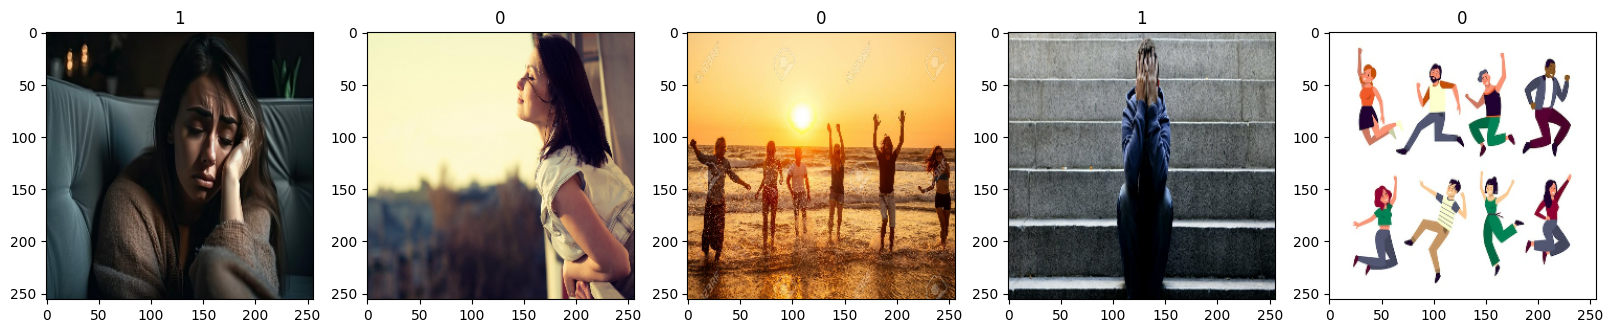

In [32]:
# Ploting the images from the batch
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# 4. Scaled Data

In [33]:
# Scaled the data of the online batches while forwarding the batches into the data pipeline
data=data.map(lambda x,y : (x/255,y))

# Acessible the data pipeline
data.as_numpy_iterator().next()

(array([[[[0.03391544, 0.07313113, 0.06920956],
          [0.0394761 , 0.07498468, 0.07106312],
          [0.04313726, 0.06666667, 0.06666667],
          ...,
          [0.10202026, 0.14907908, 0.1098634 ],
          [0.10143995, 0.14849877, 0.10928309],
          [0.09162071, 0.13867953, 0.09946385]],
 
         [[0.02933625, 0.06855194, 0.06463037],
          [0.02335768, 0.05886625, 0.05494469],
          [0.04313726, 0.06666667, 0.06666667],
          ...,
          [0.09799326, 0.14505209, 0.1058364 ],
          [0.09981617, 0.146875  , 0.10765931],
          [0.07987025, 0.12692907, 0.08771338]],
 
         [[0.02490809, 0.06412377, 0.06020221],
          [0.03996091, 0.07546949, 0.07154793],
          [0.04313726, 0.06666667, 0.06666667],
          ...,
          [0.11516544, 0.16222426, 0.12300858],
          [0.09659388, 0.1436527 , 0.10443702],
          [0.08521573, 0.13227455, 0.09305887]],
 
         ...,
 
         [[0.14301291, 0.2853536 , 0.308883  ],
          [0.08574

# 5. Split Dataset----> Train , Test  and Validation

In [34]:
# perparing the train, test and validation set size
train_size= int(len(data)*.7)
test_size = int(len(data)*.2)
validation_size = int(len(data)*.1) + 1

In [35]:
print(train_size)
print(test_size)
print(validation_size)

4
1
1


In [53]:
# creating the datasets
train_set = data.take(train_size)
test_set = data.skip(train_size).take(test_size)
validation_set = data.skip( train_size + test_size). take( validation_size)

# 6. Build Model


In [38]:
#import required dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten ,  Dense , MaxPooling2D

In [39]:
model = Sequential()

In [40]:
# building Neural Network
model.add(Conv2D( 16, (3,3), 1, activation = 'relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D( 32, (3,3), 1, activation = 'relu' ))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation  = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
# compiling the model
model.compile('adam', loss = tf.losses.BinaryCrossentropy() , metrics = ['Accuracy'])

In [42]:
# got the overall summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

# 7. Train Model

In [43]:
# trianed the model
logdir = '/content/drive/MyDrive/logs3'

In [45]:
# creating the callbacks (stores the histories)
tf_callbacks= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
hist = model.fit(train_set , epochs = 20 , validation_data= validation_set , callbacks=[tf_callbacks])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 6.5060e-04 - Accuracy: 1.0000 - val_loss: 6.1334e-04 - val_Accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 5.6284e-04 - Accuracy: 1.0000 - val_loss: 4.1469e-04 - val_Accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 5.7529e-04 - Accuracy: 1.0000 - val_loss: 5.9547e-04 - val_Accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 5.0140e-04 - Accuracy: 1.0000 - val_loss: 4.6125e-04 - val_Accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 4.7883e-04 - Accuracy: 1.0000 - val_loss: 5.4591e-04 - val_Accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 4.5358e-04 - Accuracy: 1.0000 - val_loss: 4.9789e-04 - val_Accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 3.8391e-04 - Accuracy: 1.0000 - val_loss: 2.5501e-04 - val_Ac

# 8. Plot Performance

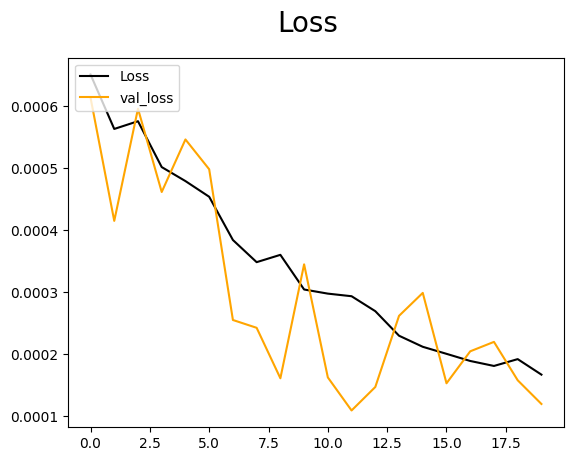

In [96]:
# plotting the loss
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'Black' , label = "Loss")
plt.plot(hist.history['val_loss'], color = 'Orange' , label = "val_loss")
plt.legend(loc = 'upper left')
fig.suptitle('Loss', fontsize = 20)
plt.show()

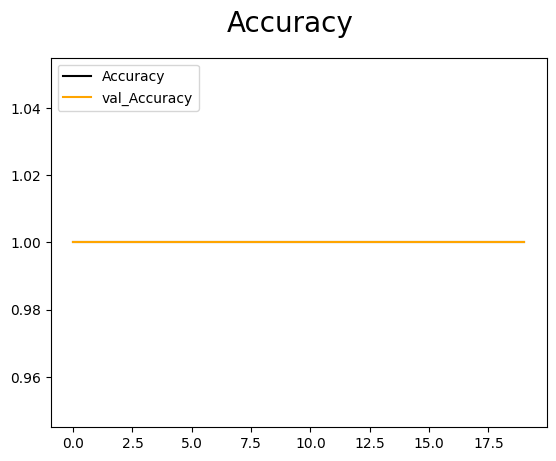

In [97]:
# plotting the accuracy
fig = plt.figure()
plt.plot(hist.history['Accuracy'], color = 'Black' , label = "Accuracy")
plt.plot(hist.history['val_Accuracy'], color = 'Orange' , label = "val_Accuracy")
plt.legend(loc = 'upper left')
fig.suptitle('Accuracy', fontsize = 20)
plt.show()

# 9. Evaluate the model

In [98]:
# import required dependencies
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [99]:
#call for object
pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

In [100]:
# evaluate the acuuracy
for batch in test_set.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y, yhat)
  Bacc.update_state(y, yhat)


1/1 [==============================] - 0s 300ms/step


In [101]:
# display the accuracy
print(f"Precision: {pre.result()}, Recall : {re.result()}, BinaryAccuracy: {Bacc.result()}")

Precision: 1.0, Recall : 1.0, BinaryAccuracy: 1.0


# 10. Testing model

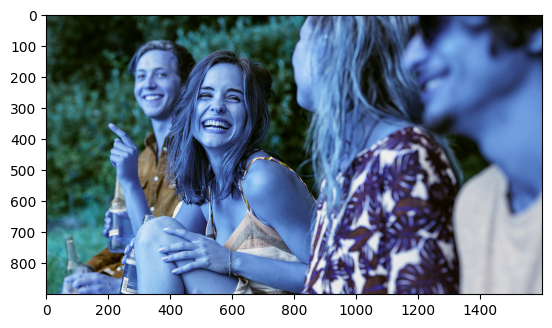

In [110]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/friends-happy-190821.jpg')
plt.imshow(img)
plt.show()

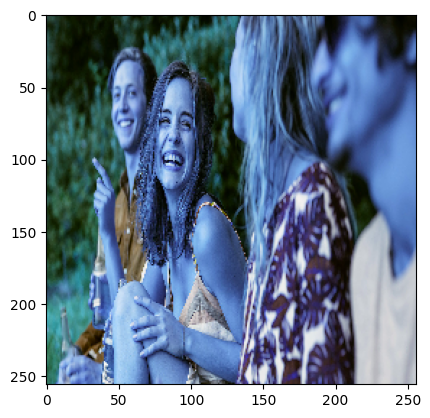

In [111]:
# resize
resize = tf.image.resize(img ,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat= model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5:
  print("Sad People")
else:
  print("Happy People")

1/1 [==============================] - 0s 31ms/step
[[0.02636694]]
Happy People


# 10. Save Model

In [115]:
# Import dependencies
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('/content/drive/MyDrive/Models','ImageClassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
# creating the new model
new_model = load_model(os.path.join('/content/drive/MyDrive/Models','ImageClassifier.h5'))

In [118]:
new_model

In [120]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 40ms/step


In [124]:
print(yhat)
if yhatnew > 0.5 :
  print("Sad People")
else :
  print("Happy People")

[[0.02636694]]
Happy People
